# Goodreads: Book rating prediction

##### Project objective
The objective of this project is to train a model that predicts the rating of a book. This will involve performing exploratory analysis of the dataset, feature engineering and selection, as well as model training and evaluation.

##### The dataset
The dataset used for this project is a collection of books from Goodreads, which has been curated using real user information. This dataset can be found on Kaggle.

## Data preparation

### Importing libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [377]:
# When importing the origianl file .CSV, I got the following error "Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13", after inspecting the file on excel, I found a delimiter problem. 
# Four lines were been splitted incorrectly, adding a extra column for these 4 lines. 
# After trying different solutions , I decided to skip the 4 bad lines using the on_bad_lines parameter.
book= pd.read_csv('C:/Users/Luciana/Documents/DSTI/Machine_learning_project/Project_1/dataset/books.csv', on_bad_lines='skip', index_col='bookID')

In [378]:
book.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [379]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [380]:
# Checking for NA's
book.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [381]:
# Checking for duplicates
book.duplicated().value_counts()

False    11123
dtype: int64

In [382]:
# Statistics for numerical features
book.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


First observations: 
- The dataset has 11 columns and 11123 rows.
- There is no null values
- The "publication_date" column is set as a string object instead of datetime
- The "language_code" column has some inconsistencies for the english language 
- The "authors" column can contain more than one author with a "/" as delimiter
- There is a empty space at the begining of the column "num_pages"
- There is no duplicated rows

### Data cleaning

#### Removing empty space from the column name "num_pages"

In [384]:
book.columns = book.columns.str.lstrip() # Remove empty space from the begining of a string (Leading)

#### Publication_date to Datetime type

In [385]:
book['publication_date'] = pd.to_datetime(book['publication_date'],format='%m/%d/%Y',errors='coerce')

In [386]:
book.info() # After the datatype transformation, 2 null values in book date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11123 non-null  object        
 1   authors             11123 non-null  object        
 2   average_rating      11123 non-null  float64       
 3   isbn                11123 non-null  object        
 4   isbn13              11123 non-null  int64         
 5   language_code       11123 non-null  object        
 6   num_pages           11123 non-null  int64         
 7   ratings_count       11123 non-null  int64         
 8   text_reviews_count  11123 non-null  int64         
 9   publication_date    11121 non-null  datetime64[ns]
 10  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


In [387]:
# Checking the 2 null values
book[book['publication_date'].isnull()]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


I checked the publication date before the transformation of the data type and the day of the date was incorrect. It was 31 instead of 30, for the months of november and june.

In [388]:
# Filling the 2 null values with the correct values
book.loc[book.index == 31373, 'publication_date'] = '2000-11-30'  
book.loc[book.index == 45531, 'publication_date'] = '1982-06-30'

#### Replacing "en-US", "en-GB", "en-CA" with "eng"

In [389]:
# Checking the unique values for the feature "language_code"
book.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [390]:
book['language_code']= book['language_code'].replace(['en-US','en-GB','en-CA', "enm"],'eng')

In [391]:
book.language_code.unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'ger', 'jpn', 'ara', 'nl',
       'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg', 'wel',
       'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

#### Replacing books that have 0 pages by the mean of num_pages

In [392]:
book.loc[(book['num_pages'] == 0)]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,2003-01-01,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,2006-10-03,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,2003-10-01,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,2005-01-01,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,1999-12-01,Simon & Schuster Audio


There is 76 books with Zero number of pages

In [393]:
# Mean by language code
book.groupby(["language_code"]).mean()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
language_code,,,,,
ale,4.360000,9.780345e+12,512.000000,102.000000,16.000000
ara,3.550000,9.789774e+12,349.000000,122.000000,12.000000
eng,3.931297,9.758529e+12,335.665465,18788.158159,569.035104
fre,3.971528,9.782231e+12,339.000000,3277.319444,64.513889
ger,3.950101,9.783324e+12,391.979798,234.727273,8.232323
gla,4.470000,9.781582e+12,250.000000,11.000000,0.000000
glg,3.360000,9.788498e+12,741.000000,36.000000,2.000000
grc,3.707273,9.780871e+12,413.363636,52.454545,2.454545
ita,4.078000,9.787121e+12,400.600000,3234.400000,55.800000


In [394]:
book['num_pages'] = book['num_pages'].replace(0, np.nan)
book['num_pages']= book['num_pages'].fillna(book.groupby('language_code')['num_pages'].transform('mean'))
print("State of missing values after processing", (book['num_pages'] == 0).sum())

State of missing values after processing 0


#### Drop 'Not a book' rows

In [395]:
book.loc[(book['authors'] == 'NOT A BOOK')]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,338.006497,7,2,2006-10-03,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,338.006497,12,1,2003-10-01,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2.000000,3,0,1996-04-01,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2.000000,0,0,2005-03-30,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2.000000,2,0,1995-10-02,BBC Physical Audio


In [396]:
book = book.loc[(book['authors'] !=  'NOT A BOOK')]

## Exploratory Data Analysis

#### Checking the distribution

[Text(0.5, 1.0, 'Average_rating distribution')]

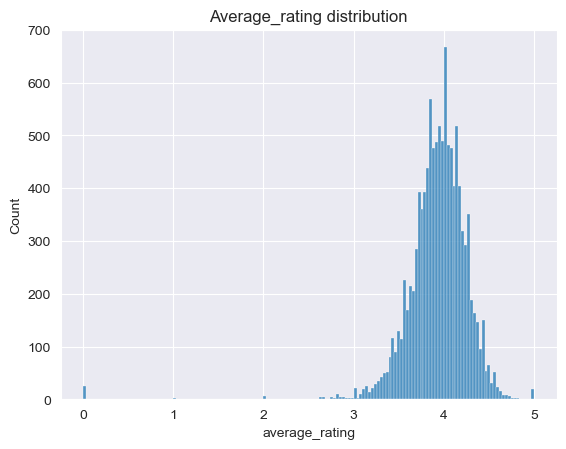

In [397]:
# Ratings distribution
sns.set_style("darkgrid")
sns.histplot(data= book, x='average_rating').set(title='Average_rating distribution')

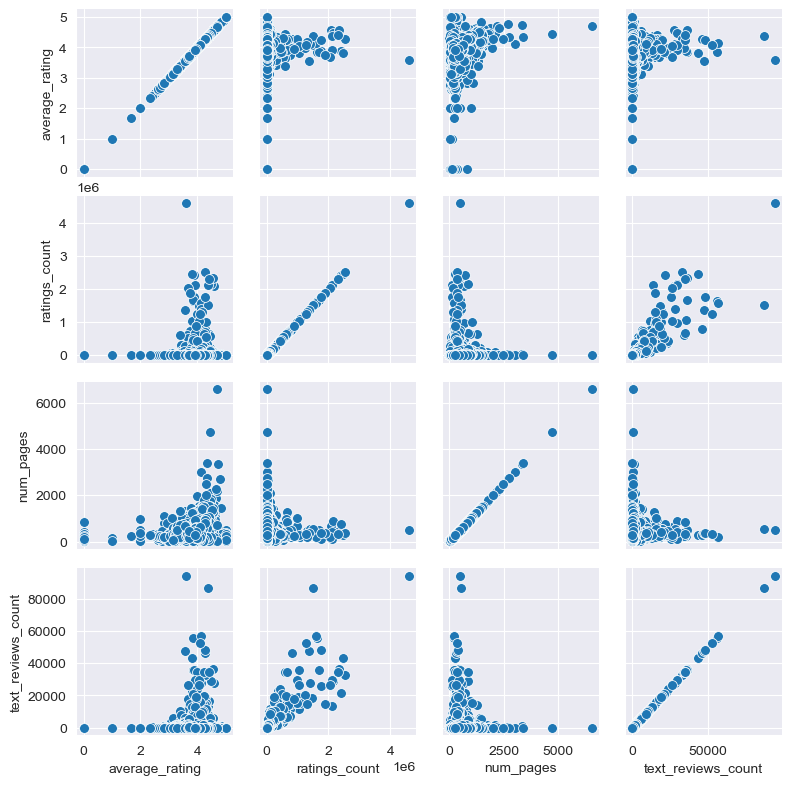

In [398]:
# Distribution of all numerical values
sns.set_style("darkgrid")
numerical_plot = sns.PairGrid(book, vars=['average_rating', 'ratings_count', 'num_pages','text_reviews_count'], height = 2)
numerical_plot.map(sns.scatterplot,  s=50, edgecolor="white")

##### Distribution by language code

In [399]:
# Distribution by language code
language_count = book.groupby(['language_code'])['language_code'].agg(['count']).sort_values(by='count', ascending=False).reset_index()
language_count

,language_code,count
0,eng,10535
1,spa,218
2,fre,144
3,ger,99
4,jpn,46
5,mul,19
6,zho,14
7,grc,11
8,por,10
9,ita,5


Text(0.5, 1.0, 'Distribution by language')

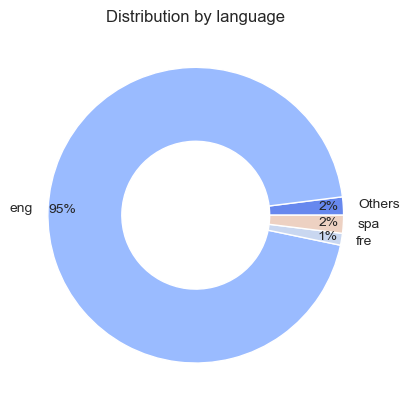

In [400]:
language_count.loc[language_count['count'] < 100, 'language_code'] = "Others"
language_count = language_count.groupby('language_code')['count'].sum().reset_index()
# Pie chart
plt.pie(language_count['count'], labels=language_count['language_code'], autopct='%0.0f%%', wedgeprops= dict(width=0.5), 
 pctdistance =0.9, colors=sns.color_palette('coolwarm'))
plt.title('Distribution by language')

#### Feature Means by Language Code

In [401]:
# Group by language_code and aggregate the necessary columns by mean and some by count
language_avg = book.groupby('language_code').agg({ 'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'num_pages': 'mean', 'title': 'count'}).sort_values(by='average_rating', ascending=False).round(0)
language_avg = language_avg.rename(columns={"num_pages": "num_pages_mean", "title": "title_count"})
language_avg

,average_rating,ratings_count,text_reviews_count,num_pages_mean,title_count
language_code,,,,,
wel,5.0,1.0,0.0,150.0,1
gla,4.0,11.0,0.0,250.0,1
zho,4.0,20.0,0.0,322.0,14
tur,4.0,1000.0,41.0,403.0,1
ale,4.0,102.0,16.0,512.0,1
lat,4.0,115.0,12.0,200.0,3
jpn,4.0,68.0,3.0,191.0,46
rus,4.0,4477.0,98.0,372.0,2
nl,4.0,67.0,9.0,744.0,1


Text(0.5, 0.98, 'Feature Means by Language Code')

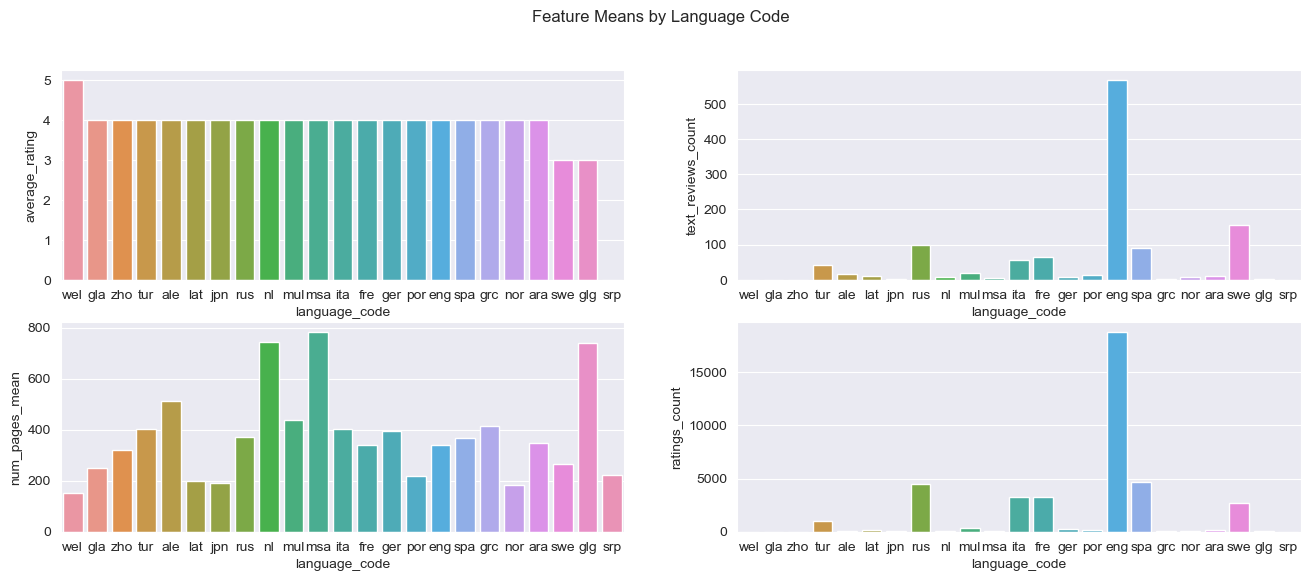

In [402]:
fig, axes = plt.subplots(2, 2, figsize=(16, 6))
sns.barplot(ax=axes[0,0], data= language_avg, x=language_avg.index, y='average_rating')
sns.barplot(ax=axes[0,1],data=language_avg, x=language_avg.index, y='text_reviews_count')
sns.barplot(ax=axes[1,0],data=language_avg, x=language_avg.index, y="num_pages_mean")
sns.barplot(ax=axes[1,1],data=language_avg, x=language_avg.index, y="ratings_count")
fig.suptitle('Feature Means by Language Code')

#### Ratings by ratings group

In [403]:
# Creating rating groups
rating_group = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9] # Limites
rating_group_label = ['0', '1', '2', '3', '4', '5'] # Label

In [404]:
# Creating a new dataset with new column 'Rating_group'
rating= book.copy()
rating['rating_group'] = pd.cut(rating['average_rating'], bins=rating_group, labels=rating_group_label)
rating.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_group
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652.0,2095690,27591,2006-09-16,Scholastic Inc.,4
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,2153167,29221,2004-09-01,Scholastic Inc.,4
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352.0,6333,244,2003-11-01,Scholastic,4
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435.0,2339585,36325,2004-05-01,Scholastic Inc.,4
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690.0,41428,164,2004-09-13,Scholastic,4


In [405]:
# Number of books by rating_group
rating_group_count = rating.groupby(['rating_group'])['rating_group'].agg(['count']).sort_values(by='rating_group', ascending=True).reset_index() 
rating_group_count['%'] = rating_group_count['count']/ len(rating) * 100
rating_group_count.round()

,rating_group,count,%
0,0,25,0.0
1,1,3,0.0
2,2,47,0.0
3,3,4599,41.0
4,4,6423,58.0
5,5,21,0.0


Text(0.5, 1.0, 'Rating by group')

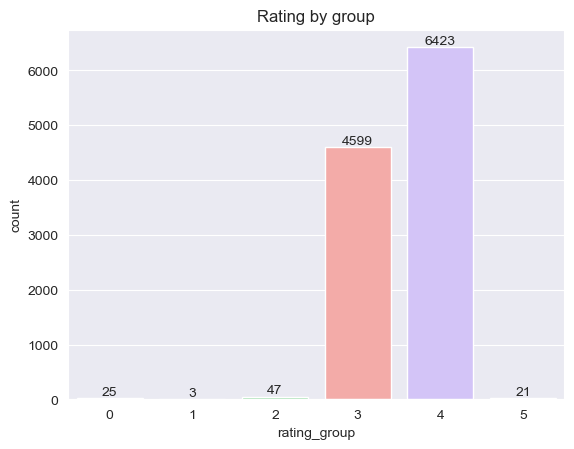

In [406]:
# Barplot ratings by group
bar = sns.barplot(data=rating_group_count, y='count', x='rating_group', palette='pastel')
bar.bar_label(bar.containers[0])
plt.title('Rating by group')

#### Checking the MAX num_pages

In [407]:
book[book.num_pages == book.num_pages.max() ]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,039306011X,9780393060119,eng,6576.0,1338,81,2004-10-17,W. W. Norton Company


In [408]:
book.loc[book['num_pages'] > 4000] # The books with more than 4000 pages are books collection.

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576.0,1338,81,2004-10-17,W. W. Norton Company
25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736.0,1493,99,1986-05-09,Mariner Books


#### Top 20 books with the highest ratings

In [409]:
# Group by title and aggregate the necessary columns
titles = book.groupby('title').agg({ 'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'num_pages': 'mean' }).sort_values(by='average_rating', ascending=False).reset_index()
titles[:20].round(1)

,title,average_rating,ratings_count,text_reviews_count,num_pages
0,His Princess Devotional: A Royal Encounter Wit...,5.0,2.0,0.0,240.0
1,Willem de Kooning: Late Paintings,5.0,1.0,0.0,83.0
2,The New Big Book of America,5.0,2.0,1.0,56.0
3,Taxation of Mineral Rents,5.0,1.0,0.0,350.0
4,The Complete Theory Fun Factory: Music Theory ...,5.0,1.0,0.0,96.0
5,Oliver Wendell Holmes in Paris: Medicine Theo...,5.0,1.0,1.0,179.0
6,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0,0.0,0.0,364.0
7,Colossians and Philemon: A Critical and Exeget...,5.0,1.0,0.0,512.0
8,Winchester Shotguns,5.0,2.0,0.0,372.0
9,Zone of the Enders: The 2nd Runner Official St...,5.0,2.0,0.0,128.0


In [410]:
# Sorting by ratings_count
titles.sort_values(by=['ratings_count', 'average_rating'], ascending=False)[:20]

,title,average_rating,ratings_count,text_reviews_count,num_pages
9235,Twilight (Twilight #1),3.59,4597666.0,94265.0,501.0
1199,The Hobbit or There and Back Again,4.27,2530894.0,32871.0,366.0
7354,The Catcher in the Rye,3.80,2457092.0,43499.0,277.0
225,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167.0,29221.0,870.0
5642,Animal Farm,3.93,2111750.0,29677.0,122.0
6441,Of Mice and Men,3.87,1755253.0,25554.0,103.0
2641,The Giver (The Giver #1),4.13,1585589.0,56604.0,208.0
583,The Book Thief,4.37,1516367.0,86881.0,552.0
9443,Eat Pray Love,3.55,1362264.0,47620.0,368.0
3203,Water for Elephants,4.09,1260027.0,52759.0,335.0


#### Average_rating vs. authors average rating

In [411]:
# Spliting the authors column
authors= book.copy()
authors['authors']= authors['authors'].str.split("/")
authors= authors.explode('authors')

# Group by authors and aggregate the necessary columns
grouped_authors = authors.groupby('authors').agg({ 'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'num_pages': 'mean' }).reset_index()
grouped_authors = grouped_authors.rename(columns={"average_rating": "author_average_rating"})  

# Merge the score back into the original DataFrame
authors_merged = pd.merge(authors, grouped_authors, on='authors', how='left').round(1)
authors_merged.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages_x,ratings_count_x,text_reviews_count_x,publication_date,publisher,author_average_rating,ratings_count_y,text_reviews_count_y,num_pages_y
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.6,0439785960,9780439785969,eng,652.0,2095690,27591,2006-09-16,Scholastic Inc.,4.5,370611.5,5470.9,664.0
1,Harry Potter and the Half-Blood Prince (Harry ...,Mary GrandPré,4.6,0439785960,9780439785969,eng,652.0,2095690,27591,2006-09-16,Scholastic Inc.,4.5,1487330.0,21334.3,902.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.5,0439358078,9780439358071,eng,870.0,2153167,29221,2004-09-01,Scholastic Inc.,4.5,370611.5,5470.9,664.0
3,Harry Potter and the Order of the Phoenix (Har...,Mary GrandPré,4.5,0439358078,9780439358071,eng,870.0,2153167,29221,2004-09-01,Scholastic Inc.,4.5,1487330.0,21334.3,902.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.4,0439554896,9780439554893,eng,352.0,6333,244,2003-11-01,Scholastic,4.5,370611.5,5470.9,664.0


[Text(0.5, 1.0, 'Average_rating vs. Authors_average_rating')]

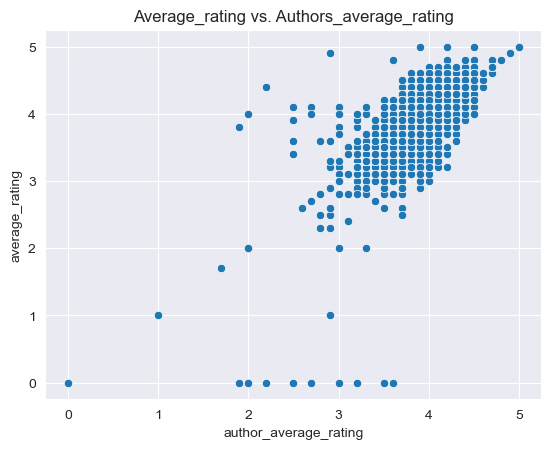

In [412]:
sns.scatterplot(data= authors_merged, x="author_average_rating", y="average_rating").set(title='Average_rating vs. Authors_average_rating')

## Feature engineering

#### Tranforms categorical data to numbers

In [413]:
from sklearn.preprocessing import OrdinalEncoder
df= book.copy()
enc = OrdinalEncoder()
enc.fit(df[['language_code']])
df[['language_code']] = enc.fit_transform(df[['language_code']]) # Apply ordinal encoding on language_code to convert it into numerical column

#### Creating new features

In [414]:
# AUTHOR POPULARITY SCORE: calculated by looking at the average rating of the author previous books, the number of ratings they've received, and the number of reviews,  weighted by the number of books they've published
# Group by author and aggregate the necessary columns
grouped = df.groupby('authors').agg({ 'average_rating': 'mean', 'ratings_count': 'sum', 'text_reviews_count': 'sum', 'title': 'count' }) # number of books published 

# Calculate the author popularity score
grouped['author_score'] = ((grouped['average_rating'] * grouped['ratings_count'] * grouped['text_reviews_count']) / grouped['title'])  # weighted by number of books published

# Merge the score back into the original DataFrame
df = pd.merge(df, grouped['author_score'], on='authors', how='left')
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_score
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652.0,2095690,27591,2006-09-16,Scholastic Inc.,8.659443e+11
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870.0,2153167,29221,2004-09-01,Scholastic Inc.,8.659443e+11
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352.0,6333,244,2003-11-01,Scholastic,8.585046e+07
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435.0,2339585,36325,2004-05-01,Scholastic Inc.,8.659443e+11
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690.0,41428,164,2004-09-13,Scholastic,8.659443e+11


In [415]:
# AUTHORS AVERAGE RATING
# Calculate the author average rating
grouped['author_rating_average'] = (grouped['average_rating'])  

# Merge the author average rating back into the original DataFrame
df = pd.merge(df, grouped['author_rating_average'], on='authors', how='left')
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_score,author_rating_average
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652.0,2095690,27591,2006-09-16,Scholastic Inc.,8.659443e+11,4.548333
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870.0,2153167,29221,2004-09-01,Scholastic Inc.,8.659443e+11,4.548333
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352.0,6333,244,2003-11-01,Scholastic,8.585046e+07,4.513636
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435.0,2339585,36325,2004-05-01,Scholastic Inc.,8.659443e+11,4.548333
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690.0,41428,164,2004-09-13,Scholastic,8.659443e+11,4.548333


In [416]:
# LANGUAGUE AVERAGE RATING
# Group by author and aggregate the necessary columns
lang_grouped = df.groupby('language_code').agg({ 'average_rating': 'mean', 'ratings_count': 'sum', 'text_reviews_count': 'sum', 'title': 'count' }) 

# Calculate the author popularity score
lang_grouped['lang_average_rating'] = (lang_grouped['average_rating'])  

# Merge the score back into the original DataFrame
df = pd.merge(df, lang_grouped['lang_average_rating'], on='language_code', how='left')
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_score,author_rating_average,lang_average_rating
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652.0,2095690,27591,2006-09-16,Scholastic Inc.,8.659443e+11,4.548333,3.931081
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870.0,2153167,29221,2004-09-01,Scholastic Inc.,8.659443e+11,4.548333,3.931081
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352.0,6333,244,2003-11-01,Scholastic,8.585046e+07,4.513636,3.931081
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435.0,2339585,36325,2004-05-01,Scholastic Inc.,8.659443e+11,4.548333,3.931081
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690.0,41428,164,2004-09-13,Scholastic,8.659443e+11,4.548333,3.931081


In [417]:
# PUBLICATION YEAR
df['publication_year'] = pd.to_datetime(df['publication_date']).dt.year
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_score,author_rating_average,lang_average_rating,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652.0,2095690,27591,2006-09-16,Scholastic Inc.,8.659443e+11,4.548333,3.931081,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870.0,2153167,29221,2004-09-01,Scholastic Inc.,8.659443e+11,4.548333,3.931081,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352.0,6333,244,2003-11-01,Scholastic,8.585046e+07,4.513636,3.931081,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435.0,2339585,36325,2004-05-01,Scholastic Inc.,8.659443e+11,4.548333,3.931081,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690.0,41428,164,2004-09-13,Scholastic,8.659443e+11,4.548333,3.931081,2004


#### Dropping columns

In [418]:
df = df.drop(columns= ['title', 'authors', 'isbn', 'isbn13', 'publication_date', 'publisher'])

## Modeling

#### Multivariate Linear Regression Model
Linear regression is a simple and commonly used regression model that tries to establish a linear relationship between the independent variables and the dependent variable

In [419]:
from sklearn.model_selection import train_test_split

X = df.drop('average_rating',axis=1) # Independet variable/ Attributes
y = df['average_rating'] # dependent variable / Label

# Split the Data into 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)

In [420]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train) 

In [421]:
# Accuracy assessment: R2
# Our current model explains 87% of our TRAIN data which is not a good result, it means it leaves 13% of the test data unexplained.
model.score(X_train, y_train)

0.875889358098295

In [422]:
# Using our test data and see how accurately our algorithm predicts the average rating 
lr_y_pred = model.predict(X_test)

In [423]:
# Accuracy assessment: R2
# Our current model explains 87% of our TEST data which is not a good result, it means it leaves 13% of the test data unexplained.
model.score(X_test, y_test)

0.8771849534064791

In [424]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Mean Absolute Error (MAE): 
# When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. 
# This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.
mae = mean_absolute_error(y_test, lr_y_pred)
print(f'Mean absolute error: {mae:.2f}')

# Mean Squared Error (MSE): It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better.
mse = mean_squared_error(y_test, lr_y_pred)
print(f'Mean squared error: {mse:.2f}')

# Root Mean Squared Error (RMSE): Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. 
# It is easier to interpret and good when we need to display or show the actual value of the data with the error. 
# It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. 
# The closer to 0, the better as well.
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.07
Mean squared error: 0.02
Root mean squared error: 0.12


In [425]:
lr_df = pd.DataFrame({'Actual_Rating': y_test, 'Predicted_Rating': lr_y_pred})
lr_df

,Actual_Rating,Predicted_Rating
1780,3.97,4.215425
6686,4.54,4.530354
11117,3.91,4.041497
4134,3.31,3.306040
6654,3.92,3.838417
...,...,...
7687,4.14,4.071212
3108,4.46,4.438825
5401,3.85,3.831373
4513,3.73,3.731452


#### Decision Tree
Decision trees are a non-parametric method that can be used for both regression and classification. They partition the data into smaller and smaller subsets based on the values of the independent variables

In [426]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

# Training the algorithm
regressor = DecisionTreeRegressor().fit(X_train, y_train) 

In [427]:
# Accuracy assessment: R2 on TRAIN data
# Our current model explains 87% of our TRAIN data which is not a good result, it means it leaves 13% of the test data unexplained.
regressor.score(X_train, y_train)

0.9999999078694201

In [428]:
# Using our test data and see how accurately our algorithm predicts the average rating 
dt_y_pred = regressor.predict(X_test)

In [429]:
# Accuracy assessment: R2 on TEST data
# Our current model explains 87% of our TEST data which is not a good result, it means it leaves 13% of the test data unexplained.
model.score(X_test, y_test)

0.8771849534064791

In [430]:
# Mean Absolute Error (MAE): 
mae = mean_absolute_error(y_test, dt_y_pred)
print(f'Mean absolute error: {mae:.2f}')

# Mean Squared Error (MSE): 
mse = mean_squared_error(y_test, dt_y_pred)
print(f'Mean squared error: {mse:.2f}')

# Root Mean Squared Error (RMSE): 
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.09
Mean squared error: 0.03
Root mean squared error: 0.17


In [431]:
dt_df = pd.DataFrame({'Actual_Rating': y_test, 'Predicted_Rating': dt_y_pred})
dt_df

,Actual_Rating,Predicted_Rating
1780,3.97,4.14
6686,4.54,4.54
11117,3.91,3.82
4134,3.31,3.54
6654,3.92,3.82
...,...,...
7687,4.14,4.14
3108,4.46,4.45
5401,3.85,4.14
4513,3.73,3.72


#### Random Forest Regression
Random forest is an ensemble method that uses multiple decision trees to improve the performance and reduce overfitting.

In [432]:
from sklearn.ensemble import RandomForestRegressor

# Training the algorithm
regressor = RandomForestRegressor().fit(X_train, y_train) 

In [433]:
# Accuracy assessment: R2 on TRAIN data
# Our current model explains 87% of our TRAIN data which is not a good result, it means it leaves 13% of the test data unexplained.
regressor.score(X_train, y_train)

0.9801872960561909

In [434]:
# Using our test data and see how accurately our algorithm predicts the average rating 
rf_y_pred = regressor.predict(X_test)

In [435]:
# Accuracy assessment: R2 on TEST data
# Our current model explains 87% of our TEST data which is not a good result, it means it leaves 13% of the test data unexplained.
model.score(X_test, y_test)

0.8771849534064791

In [436]:
# Mean Absolute Error (MAE): 
mae = mean_absolute_error(y_test, rf_y_pred)
print(f'Mean absolute error: {mae:.2f}')

# Mean Squared Error (MSE): 
mse = mean_squared_error(y_test, rf_y_pred)
print(f'Mean squared error: {mse:.2f}')

# Root Mean Squared Error (RMSE): 
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.07
Mean squared error: 0.02
Root mean squared error: 0.13


In [437]:
rf_df = pd.DataFrame({'Actual_Rating': y_test, 'Predicted_Rating': rf_y_pred})
rf_df

,Actual_Rating,Predicted_Rating
1780,3.97,4.1288
6686,4.54,4.5066
11117,3.91,4.0582
4134,3.31,3.3180
6654,3.92,3.8855
...,...,...
7687,4.14,4.1030
3108,4.46,4.4637
5401,3.85,3.9633
4513,3.73,3.7304


### Compare the results from the three models

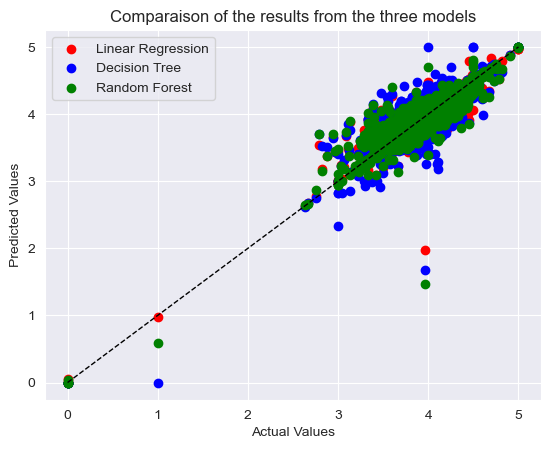

In [438]:
# Create scatterplot
plt.scatter(y_test, lr_y_pred, color='red', label='Linear Regression')
plt.scatter(y_test, dt_y_pred, color='blue', label='Decision Tree')
plt.scatter(y_test, rf_y_pred, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1) # add diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.title('Comparaison of the results from the three models')
plt.show()

## Results
1. **Accuracy assessment**: This metric measures how well the model predicts the target variable, on a scale from 0 to 1. An accuracy of 1 indicates a perfect prediction, while a lower accuracy score means that the model's predictions are less accurate. In this case, the **Decision Tree model has the highest accuracy of the three models** (0.9999999078694201), followed by the random forest model (0.9796798714221829), and the linear regression model (0.875889358098295).

   | Linear Regression | Decision Tree | Random Forest |
   |:---------------:|:---------------:|:---------------:|
   | 0.8758 | 0.9999 | 0.9796 | 

2. **Mean absolute error (MAE)**: This metric measures the average absolute difference between the model's predicted values and the actual values. **The lower the MAE, the better the model's predictions.** In this case, both **linear regression and random forest** models have the same MAE (0.07), while the decision tree model has a slightly higher MAE of 0.09.

   | Linear Regression | Decision Tree | Random Forest |
   |:---------------:|:---------------:|:---------------:|
   | 0.07 | 0.09| 0.07 | 

3. **Mean squared error (MSE)**: This metric measures the average squared difference between the model's predicted values and the actual values. **The lower the MSE, the better the model's predictions.** In this case, all three models have **the same MSE** value of 0.02.

   | Linear Regression | Decision Tree | Random Forest |
   |:---------------:|:---------------:|:---------------:|
   | 0.02 | 0.02| 0.02 | 

4. **Root mean squared error (RMSE)**: This metric is the square root of the MSE, and is used to measure the average difference between the model's predicted values and the actual values. **The lower the RMSE, the better the model's predictions.** In this case, the decision tree model has the highest RMSE (0.17), followed by the random forest model (0.13), and the **linear regression model has the lowest RMSE (0.12)**.

   | Linear Regression | Decision Tree | Random Forest |
   |:---------------:|:---------------:|:---------------:|
   | 0.12 | 0.17 | 0.13 | 

In summary, the results suggest that the **decision tree model has the highest accuracy**, but also has the highest RMSE, while the **linear regression model has the lowest RMSE but lower accuracy**. The **random forest model appears to have a good balance between accuracy and RMSE**, and has the same MAE as the linear regression model.